In [16]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name: str   ## not validated at runtime
    game: Literal["chess", "cricket"]

In [6]:
def play_game(state: TypedDictState) -> TypedDictState:
    print("Play game has been callled--")
    return {"name": state["name"]+ " want to play "}

def cricket(state: TypedDictState) -> TypedDictState:
    print("Cricket node function called")
    return {"game": "cricket"}

def chess(state: TypedDictState) -> TypedDictState:
    print("Chess node function called")
    return {"game": "chess"}

In [8]:
import random
def decide_game(state: TypedDictState) -> Literal["chess", "cricket"]:
    print("Decide game node function called")
    if random.random() > 0.5:
        return "chess"
    else:
        return "cricket"

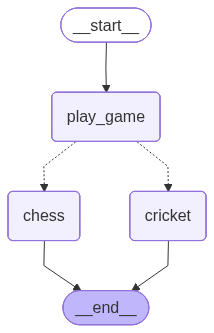

In [ ]:
from IPython.display import display,Image
from langgraph.graph import StateGraph, START, END

builder= StateGraph(TypedDictState)
builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("chess", chess)

## Flow
builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_game)
builder.add_edge("cricket", END)
builder.add_edge("chess", END)

## ADd
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({'name':"Alice"})

Play game has been callled--
Decide game node function called
Chess node function called


{'name': 'Alice want to play ', 'game': 'chess'}

## DataClasses

In [17]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    name: str
    game: Literal["chess", "cricket"]

In [ ]:
def play_game(state: DataclassState):
    print("Play game has been callled--")
    return {"name": state.name+ " want to play "}

def cricket(state: DataclassState) :
    print("Cricket node function called")
    return {"game": "cricket"}

def chess(state: DataclassState):
    print("Chess node function called")
    return {"game": "chess"}

def decide_game(state: DataclassState) -> Literal["chess", "cricket"]:
    print("Decide game node function called")
    if random.random() > 0.5:
        return "chess"
    else:
        return "cricket"

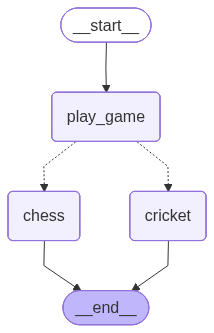

In [18]:
from IPython.display import display,Image
from langgraph.graph import StateGraph, START, END

builder= StateGraph(DataclassState)
builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("chess", chess)

## Flow
builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_game)
builder.add_edge("cricket", END)
builder.add_edge("chess", END)

## ADd
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke(DataclassState(name="Alice", game="chess"))

Play game has been callled--
Decide game node function called
Cricket node function called


{'name': 'Alice want to play ', 'game': 'cricket'}